In [8]:
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import netCDF4 as nc
%matplotlib inline

In [2]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon=bathy.variables['nav_lon'][::10,::10]
nemolat=bathy.variables['nav_lat'][::10,::10]
bathy=bathy.variables['Bathymetry'][::10,::10]

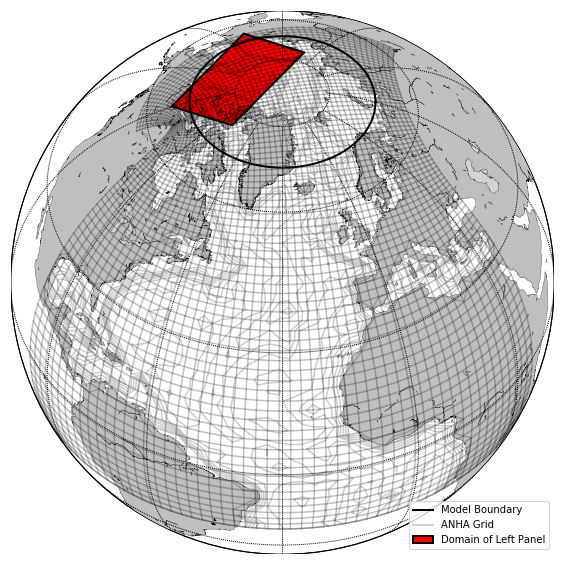

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
map = Basemap(projection='ortho',lat_0=45,lon_0=-30,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='0.75',lake_color='lightgrey')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# compute native map projection coordinates of lat/lon grid.
n_lon,n_lat = map(nemolon,nemolat)
map.plot(n_lon,n_lat,n_lon.T,n_lat.T,c='black',alpha=0.25)
map.contour(n_lon,n_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)

bclon = np.linspace(0,360,360)
bclat = np.ones_like(bclon)*70
bc_lon,bc_lat = map(bclon,bclat)
map.plot(bc_lon,bc_lat,c='black',lw=2,label="Model Boundary")
map.plot(n_lon[0],n_lat[0],c='black',alpha=0.25,label="ANHA Grid")

map2 = Basemap(width =3e6,height =1.8e6,lon_0=-155, lat_0=78,projection='stere', resolution='l')
lbx1, lby1 = map(*map2(map2.xmin, map2.ymin, inverse=True))
ltx1, lty1 = map(*map2(map2.xmin, map2.ymax, inverse=True))
rtx1, rty1 = map(*map2(map2.xmax, map2.ymax, inverse=True))
rbx1, rby1 = map(*map2(map2.xmax, map2.ymin, inverse=True))
verts1 = [(lbx1, lby1),# left, bottom
    (ltx1, lty1),# left, top
    (rtx1, rty1),# right, top
    (rbx1, rby1),# right, bottom
    (lbx1, lby1),# ignored
    ]
codes2 = [Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
    ]
path = Path(verts1, codes2)
patch = patches.PathPatch(path, facecolor='r', lw=2, label="Domain of Left Panel")
ax.add_patch(patch)


plt.legend(loc=4)
#plt.show()
plt.savefig('globe.pdf')
plt.savefig('globe.png')